In [1]:
#could not upload CIFAR-10 dataset on github. You can get it from roboflow.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
transform=transforms.ToTensor()

In [3]:
train_data=datasets.CIFAR10(root='E:/PYTORCH_NOTEBOOKS/Data',train=True,download=True,transform=transform)

100%|██████████| 170498071/170498071 [00:38<00:00, 4446995.39it/s]


Extracting E:/PYTORCH_NOTEBOOKS/Data\cifar-10-python.tar.gz to E:/PYTORCH_NOTEBOOKS/Data


In [4]:
test_data=datasets.CIFAR10(root='E:/PYTORCH_NOTEBOOKS/Data',train=False,download=True,transform=transform)

Files already downloaded and verified


In [5]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E:/PYTORCH_NOTEBOOKS/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: E:/PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [8]:
class_names=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

LABELS [9 7 7 2 5 2 4 1 1 9]
CLASS truck horse horse bird dog bird deer car car truck


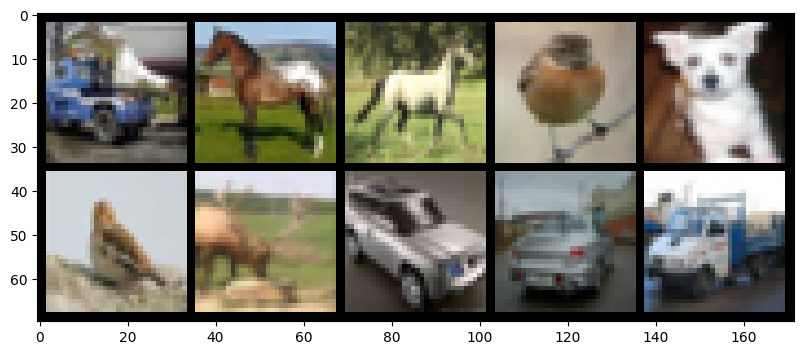

In [9]:
for images,labels in train_loader:
    break

print('LABELS',labels.numpy())
print('CLASS',*np.array([class_names[i] for i in labels]))
im=make_grid(images,nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [10]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,5,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(6*6*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,16*6*6)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)

In [11]:
model=ConvolutionalNetwork()

In [12]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [13]:
criterion =nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [14]:
import time
start_time=time.time()
epochs=10
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for batch,(x_train,y_train) in enumerate(train_loader):
        batch+=1
        y_predicted=model(x_train)
        loss=criterion(y_predicted,y_train)
        predicted=torch.max(y_predicted.data,1)[1]
        batch_correct =(predicted==y_train).sum()
        trn_corr+=batch_correct
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%1000 ==0:
            print(f'epoch: {i:2}  batch: {batch:4} [{10*batch:6}/50000]  loss: {loss.item():10.8f} accuracy: {trn_corr.item()*100/(10*batch):7.3f}%')
    train_losses.append(loss)
    train_correct.append(trn_corr)
    with torch.no_grad():
        for batch,(x_test,y_test) in enumerate(test_loader):
            y_value=model(x_test)
            predicted= torch.max(y_value.data,1)[1]
            tst_corr += (predicted==y_test).sum()
        loss=criterion(y_value,y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)

total_time=time.time()-start_time
print(f"DURATION WAS {total_time} seconds")

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.45436084 accuracy:  24.780%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.33214509 accuracy:  30.880%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.05374634 accuracy:  34.997%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.88521266 accuracy:  37.517%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.23135126 accuracy:  39.342%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.70493472 accuracy:  50.080%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.18702006 accuracy:  49.265%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.36523414 accuracy:  49.720%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 2.17261934 accuracy:  50.133%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.26943851 accuracy:  50.622%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.81314683 accuracy:  54.260%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.80872536 accuracy:  54.705%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 0.88764888 accuracy:  54.663%
epoch:  2  batch: 4000 [ 

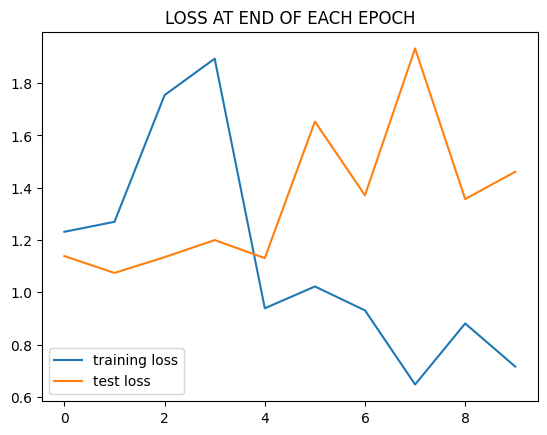

In [15]:
plt.plot([i.detach().numpy() for i in train_losses],label='training loss')
plt.plot([i.detach().numpy() for i in test_losses],label='test loss')
plt.title('LOSS AT END OF EACH EPOCH')
plt.legend();

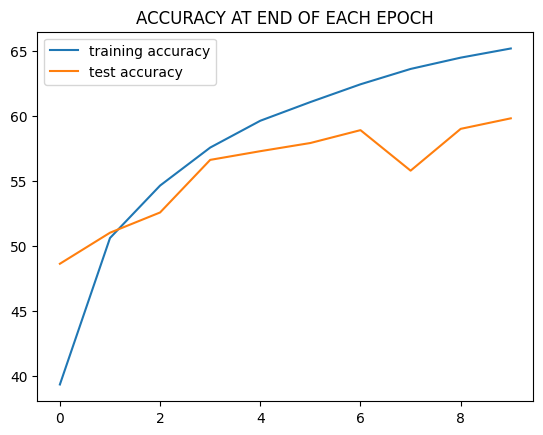

In [16]:
plt.plot([t/500 for  t in train_correct],label='training accuracy')
plt.plot([t/100 for t in test_correct],label='test accuracy')
plt.title('ACCURACY AT END OF EACH EPOCH')
plt.legend();

In [17]:
test_load_all=DataLoader(test_data,batch_size=10000,shuffle=False)


In [18]:
with torch.no_grad():
    correct=0
    for x_test,y_test in test_load_all:
        y_value=model(x_test)
        predicted=torch.max(y_value,1)[1]
        correct += (predicted == y_test).sum()
print(f"ACCURACY IS :{correct/100}%")

ACCURACY IS :59.84000015258789%


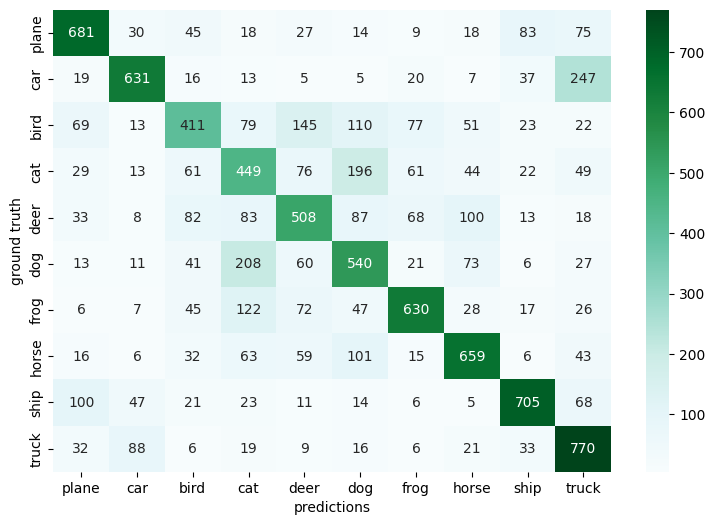

In [19]:
arr=confusion_matrix(y_test.view(-1),predicted.view(-1))
df_cm=pd.DataFrame(arr,class_names,class_names)
plt.figure(figsize=(9,6))
sn.heatmap(df_cm,annot=True,fmt="d",cmap="BuGn")
plt.xlabel("predictions")
plt.ylabel("ground truth")
plt.show();